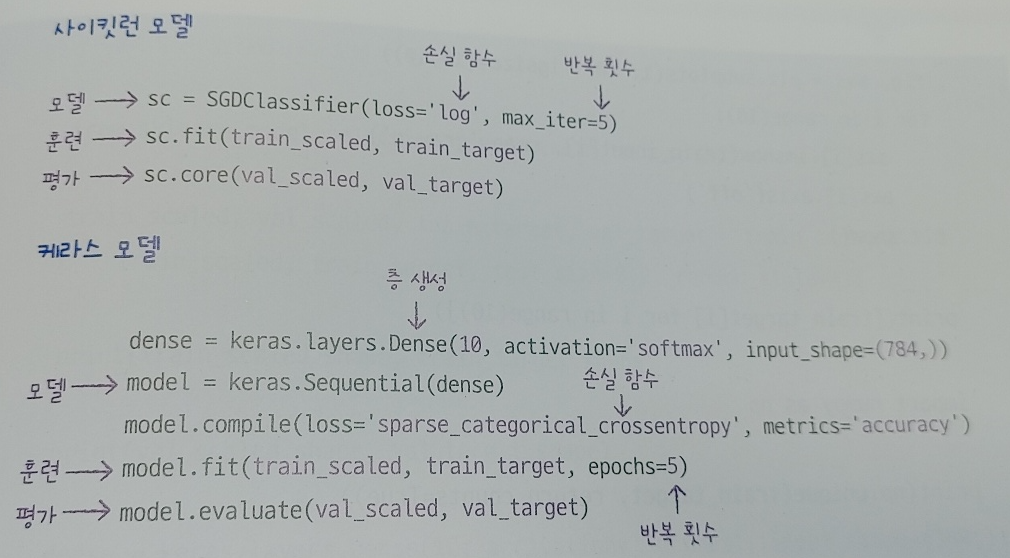

### Tensorflow
-  Dense는 신경망에서 가장 기본 층인 밀집층을 만드는 클래스
  - 첫 번째 매개변수는 뉴런의 개수 지정
  - activation 매개변수에는 사용할 활성화 함수 지정. 대표적으로 'sigmoid', 'softmax' 함수가 있다. 아무것도 지정하지 않으면 활성화 함수를 사용하지 않는다.
  - keras 의 Sequential 클래스에 맨 처음 추가되는 층에는 input_shape 매개변수로 입력의 크기 지정
  

- Sequential 은 케라스에서 신경망 모델을 만드는 클래스
  
  - 이 클래스의 객체를 생성할 때 신경망 모델에 추가할 층을 지정할 수 있다. 추가할 층이 1개 이상일 경우 파이썬 리스트로 전달한다.


- compile() 은 모델 객체를 만든 후 훈련하기 전에 사용할 손실 함수와 측정 지표 등을 지정하는 메서드
  - loss 매개변수에 손실함수를 지정. 이진 분류일 경우 'binary_crossentropy', 다중 분류일 경우 'categorical_crossentropy'로 지정. 희귀 모델일 경우 'mean_square_error' 등으로 지정
  - metrics 매개변수에 훈련 과정에서 측정하고 싶은 지표를 지정할 수 있다. 측정 지표가 1개 이상일 경우 리스트로 전달


- fit() 은 모델을 훈련하는 메서드
  - 첫 번째와 두 번째 매개변수에 입력과 타깃 데이터를 전달
  - epochs 매개변수에 전체 데이터에 대해 반복할 에포크 횟수 지정


- evaluate() 는 모델 성능을 평가하는 메서드
  - 첫 번째와 두 번째 매개변수에 입력과 타깃 데이터를 전달
  - compile() 메서드에서 loss 매개변수에 지정한 손실 함수의 값과 metrics 매개변수에서 지정한 측정 지표 출력

## **DNN ( Deep Neural Network ) : 심층 신경망**

- 케라스 API를 사용해서 패션 MNIST 데이터셋을 불러오자

In [5]:
from tensorflow import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


- 이미지의 픽셀값을 0 ~ 255 범위에서 0 ~ 1 사이로 변환하고, 28 * 28 크기의 2차원 배열을 784 크기의 1차원 배열로 펼친다.
- 사이킷런의 train_test_split 함수로 훈련세트와 검증 세트로 나눈다.

In [7]:
train_scaled = X_train.reshape(-1, 28 * 28)
print(train_scaled.shape)

(60000, 784)


- 인공 신경망 모델에 층을 2개 추가
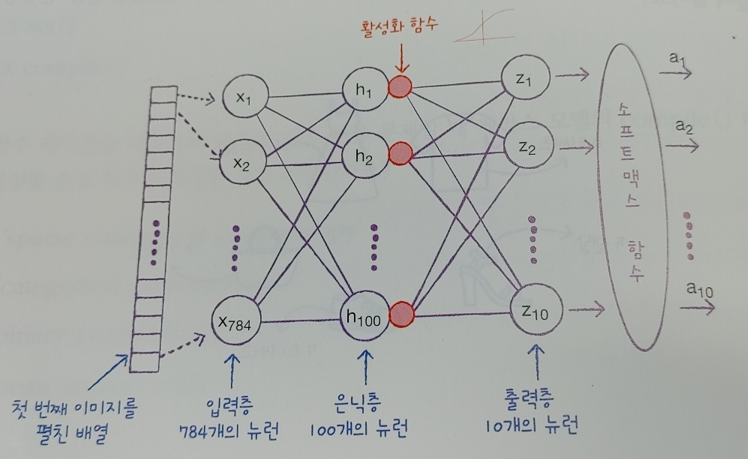


- 위 그림에서 앞의 인공신경망 모델과 다른 점은 입력층과 출력층 사이에 밀집층이 추가된 것이다. 이렇게 입력층과 출력층 사이에 있는 모든 층을 은닉층(hidden layer)라고 부른다.

- 출력층에 사용되는 활성화 함수는 제한적이다. 이진 분류에서는 시그모이드 함수, 다중 분류일 경우는 소프트맥스 함수를 사용한다.

- 은닉층(hidden layer)의 활성화 함수는 비교적 자유롭다. 대표적으로 시그모이드 함수와 렐루(ReLU) 함수를 사용


- 분류 문제는 클래스에 대한 확률을 출력하기 위해 활성화 함수를 사용한다. **회귀의 출력은 임의의 어떤 숫자이므로 활성화 함수를 적용할 필요가 없다.** 즉, 출력층의 선형 방정식의 계산을 그대로 출력한다. 이렇게 하려면 Dense 층의 activation 매개변수에 아무런 값도 지정하지 않는다.

- 시그모이드 함수는 뉴런의 출력 z 값을 0과 1사이로 압축해준다.

- 시그모이드 활성화 함수를 사용한 은닉층과 소프트맥스 함수를 사용한 출력층을 케라스의 Dense 클래스로 만들기
- 케라스에서 신경망의 첫 번째 층은 input_shape 매개변수로 입력의 크기를 꼭 지정해야 한다.

In [11]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)) #  은닉층 뉴런 100, 활성화함수 sigmoid
dense2 = keras.layers.Dense(10, activation='softmax') # input_shape는 첫 번 째 층만 지정

C:\Users\kj\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- dense1 이 은닉층이고 100개의 뉴런을 가진 밀집층이다. 활성화 함수는 'sigmoid'로 지정했고 input_shape 매개변수에서 입력의 크기를(784,)로 지정했다. 은닉층의 뉴런 개수를 정하는데는 특별한 기준이 없다. 몇 개의 뉴런을 두어야 할지 판단하기 위해서는 상당한 경험이 필요하다.
- 여기에서 한 가지 제약사항이 있다면 적어도 출력층의 뉴런보다는 많게 만들어야 한다. 클래스 10개에 대한 확률을 예측해야 하는데 이전 은닉층의 뉴런이 10개보다 적다면 부족한 정보가 전달될 것이다.
- dense2는 출력층이다. 10개의 클래스를 분류하므로 10개의 뉴런을 두었고 활성화 함수는 소프트맥스 함수로 지정했다.

In [13]:
model = keras.Sequential([dense1, dense2])

#### 심층 신경망 만들기
- 위에서 만든 dense1과 dense2 객체를 Sequential 클래스에 추가하여 심층 신경망을 만들어 보자
- Sequential 클래스의 객체를 만들 때 여러 개의 층을 추가하려면 dense1과 dense2를 리스트로 만들어 전달한다.
- 여기서 주의할 것은 출력층을 가장 마지막에 두어야 한다는 것이다. dense 층들은 가장 처음 등장하는 은닉층에서 마지막 출력층의 순서로 리스트에 나열해야한다.

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

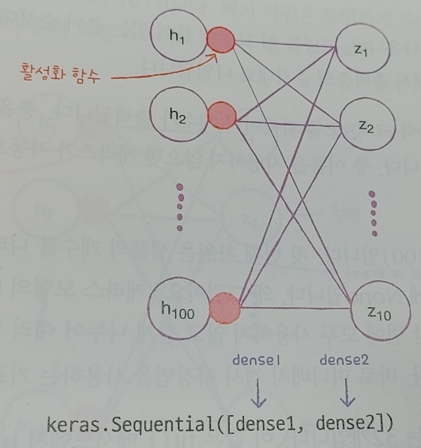

- 인공신경망의 강력한 성능은 바로 이렇게 층을 추가하여 입력 데이터에 대해 연속적인 학습을 진행하는 능력에서 나온다.

- 케라스는 모델의 summary() 메서드를 호출하면 층에 대한 유용한 정보 출력

(None, 100)    
배치 차원 None   
출력 차원 100   

- 맨 첫 줄에 모델의 이름이 나온다. 그 다음 이 모델에 들어 있는 층의 순서대로 나열된다. 이 순서는 맨 처음 추가한 은닉층에서 출력층의 순서대로 나열된다.
- 층마다 층 이름, 클래스, 출력 크기, 모델 파라미터 개수가 출력된다. 층을 만들 때 name 매개변수로 이름을 지정할 수 있다. 층 이름을 지정하지 않으면 케라스가 자동으로 'dense'라고 이름을 붙인다.
- 출력 크기를 보면 (None, 100) 이다. 첫 번째 차원은 샘플의 개수를 나타낸다. 샘플 개수가 아직 정의되어 있지 않기 때문에 None이다. 왜 그럴까? 케라스 모델의 fit() 함수에 훈련 데이터를 주입하면 이 데이터를 한 번에 모두 사용하지 않고 잘게 나누어 여러번에 걸쳐 경사하강법 단계를 수행한다. 그렇다. 바로 미니배치 경사하강법을 사용하는 거다.
- 케라스의 기본 미니배치 크기는 32개이다. 이 값은 fit() 함수에서 batch_size 매개변수로 바꿀 수 있다. 따라서 샘플 개수를 고정하지 않고 어떤 배치크기에도 유연하게 대응할 수 있도록 None으로 설정한다. 이렇게 신경망 층에 입력되거나 출력되는 배열의 첫 번째 차원을 배치 차원이라고 부른다.
- 두 번째 100은 쉽다. 은닉층의 뉴런 개수를 100개로 두었으니 100개의 출력이 나올것이다. 즉 샘플마다 784개의 픽셀값이 은닉층을 통과하면서 100개의 특성으로 압축되었다. 
- 마지막으로 모델 파라미터 개수가 출력된다. 이 층은 Dense 층이므로 입력 픽셀 784개와 100개의 모든 조합에 대한 가중치가 있다. 그리고 뉴런마다 1개의 절편이 있다. 
- 두 번째 층의 출력 크기는 (None, 10)이다. 배치 차원은 동일하게 None이고 출력 뉴런의 개수가 10개이기 때문이다. 이 층의 모델 파라미터 개수는 몇 개일까?
- 100개의 은닉층 뉴런과 10개의 출력층 뉴런이 모두 연결되고 출력층의 뉴런마다 하나의 절편이 있기 때문에 총 1,010개의 모델 파라미터가 된다.
- summary() 함수의 마지막에는 총 모델 파라미터 개수와 훈련되는 파라미터 개수가 동일하게 79,510개로 나온다. 은닉층과 출력층의 파라미터 개수를 합친 값이다. 
- 그 아래 훈련되지 않는 파라미터(Non-trainable params)는 0으로 나온다. 간혹 경사하강법으로 훈련되지 않는 파라미터를 가진 층이 있다. 이런 층의 파라미터 개수가 여기에 나온다.

#### 층을 추가하는 다른 방법
- 모델을 훈련하기 전에 Sequential 클래스에 층을 추가하는 다른 방법
  - 위에서 만들었던 dense1과 dense2는 따로 사용할 일이 없어서 Sequential 클래스의 매개변수에서 바로 Dense 클래스 객체를 만들어서 층을 추가

In [22]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)),
    keras.layers.Dense(50, activation='softmax'),
], name='모델1')

- 이렇게 작업하면 추가되는 층을 한눈에 쉽게 알아보는 장점이 있다. 이전과 달리 이번에는 Sequential 클래스의 name 매개변수로 모델의 이름을 지정했다. 또 Dense 층의 name 매개변수에 층의 이름을 'hidden'과 'output'으로 각각 지정했다. 모델의 이믈과 달리 층의 이름은 반드시 영문이어야 한다. summary() 함수의 출력에 이름이 잘 반영되는지 확인해 보자.

In [24]:
model.summary()

Model: "모델1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 50)                  │           5,050 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 83,550 (326.37 KB)

 Trainable params: 83,550 (326.37 KB)

 Non-trainable params: 0 (0.00 B)

- 2개의 Dense 층이 이전과 동일하게 추가되었고 파라미터 개수도 같다. 바뀐 것은 모델 이름과 층 이름이다. 여러 모델과 많은 층을 사용할 때 name 매개변수를 사용하면 구분하기 쉽다. 

- 위 처럼 층을 추가하면 편리하지만 아주 많은 층을 추가하려며 Sequential 클래스 매개변수 생성자가 매우 길어진다. 또 조건에 따라 층을 추가할 수도 없다. 
- Sequential 클래스에서 층을 추가할때 가장 널리 사용하는 방법은 모델의 add() 메서드 이용
- 이 방법은 Sequential 클래스의 객체를 만들고 이 객체의 add() 함수를 호출하여 층을 추가한다.

In [27]:
model = keras.Sequential(name='model2')
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'))
model.add(keras.layers.Dense(10, activation='softmax', name='output'))

- Dense 클래스의 객체를 따로 변수에 담지 않고 바로 add() 함수로 전달한다. 이 방법은 한눈에 추가되는 층을 볼 수 있고 프로그램 실행 시 동적으로 층을 선택하여 추가할 수 있다.
- summary() 함수의 결과에서 층과 파라미터 개수는 당연히 동일하다.

In [29]:
model.summary()

Model: "model2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden (Dense)                       │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

- 모델 훈련

- 모델을 훈련하는 것은 앞에서 사용한 compile() 함수와 설정을 그대로 사용한다. 여기에서도 5번의 에포크 동안 훈련해 보자

In [32]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [33]:
model.fit(train_scaled, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6623 - loss: 1.0088
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7778 - loss: 0.6037
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7910 - loss: 0.5732
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8002 - loss: 0.5515
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8085 - loss: 0.5370


- 훈련 세트에 대한 성능을 보면 추가된 층이 성능을 향상시켰다는 것을 잘 알 수 있다. 인공 신경망에 몇 개의 층을 추가하더라도 compile()메서드와 fit() 함수의 사용법은 동일하다. 이것이 케라스 API의 장점이다.
- 이미지 분류 문제에서 높은 성능을 낼 수 있는 활성화 함수에 대해 알아보자.

#### 렐루 함수(ReLU)

- 초창기 인공신경망의 은닉층에 많이 사용된 활성화 함수는 시그모이드 함수였다. 하지만 이 함수에는 단점이 있다. 이 함수의 오른쪽과 왼쪽 끝으로 갈수록 그래프가 누워있기 때문에 올바른 출력을 만드는데 신속하게 대응하지 못한다.

- 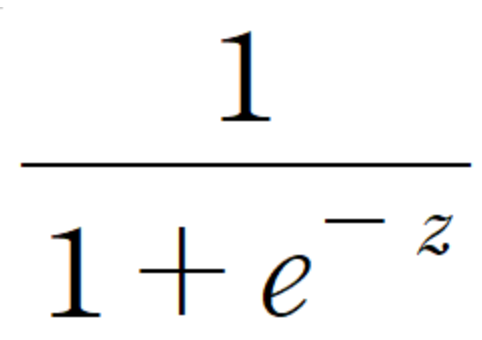
- 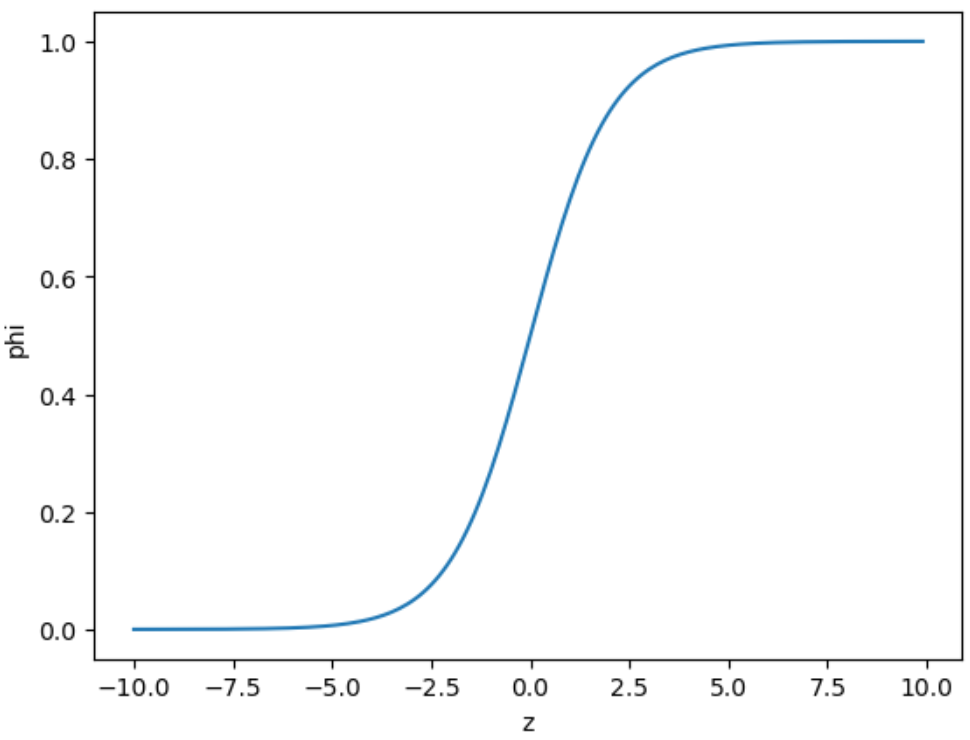



- 특히 층이 많은 심층신경망일수록 그 효과가 누적되어 학습을 더 어렵게 만든다. 이를 개선하기 위해 다른 종류의 활성화 함수가 제안되었다. 바로 렐로 함수이다. 렐루 함수는 아주 간단하다. 입력이 약수일 경우 마치 활성화 함수가 없는것처럼 그냥 입력을 통과시키고 음수일 경우에는 0으로 만든다.

- 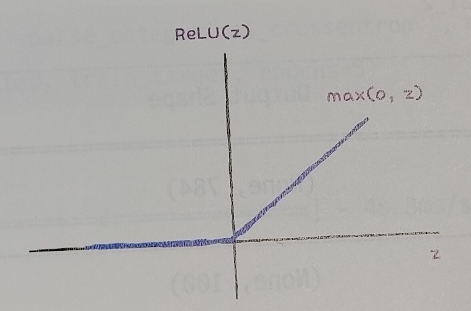


- 렐루 함수는 max(0, z) 와 같이 쓸수 있다. 이 함수는 z가 0보다 크면 z를 출력하고 z가 0보다 작으면 0을 출력한다.
- 렐루 함수는 특히 이미지 처리에서 좋은 성능을 낸다고 알려져 있다.


- 은닉층의 활성화 함수에 시그모이드 함수 대신 렐루 함수를 적용하기 전에 케라스에서 제공하는 편리한 층 하나를 보자
- 패션 MNIST 데이터는 2차원 샘플이기 때문에 인공 신경망에 주입하기 위해 reshape() 메서드를 사용해서 1차원으로 펼쳤다.
- 직접 이렇게 1차원으로 펼쳐도 좋지만 케라스에서는 이를 위한 Flatten 층을 제공한다.
- Flatten 클래스는 배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할만 한다. 입력에 곱해지는 가중치나 절편이 없다. 따라서 인공신경망의 성능을 위해 기여하는 바는 없다. 하지만 Flatten 클래스를 층처럼 입력층과 은닉층 사이에 추가하기 때문에 이를 층이라 부른다. Flatten 층은 입력층 바로 뒤에 추가한다.

- 첫 번째 Dense 층에 있던 input_shape 매개변수를 Flatten 층으로 옮겼다. 또 첫 번째 Dense 층의 활성화 함수를 'relu'로 바꿨다. 하지만 이 신경망을 깊이가 3인 신경망이라고 부르지 않는다. Flatten 클래스는 학습하는 층이 아니니까.
- 모델의 summary() 함수를 호출해 보면 이런 점을 더 확실히 알 수 있다.

- 첫 번째 등장하는 Flatten 클래스에 포함된 모델 파라미터는 0개이다. 케라스의 Flatten 층을 신경망 모델에 추가하면 입력값의 차원을 짐작할 수 있는 것이 또 하나의 장점이다. 앞의 출력에서 784개의 입력이 첫 번째 은닉층에 전달되는 것을 알 수 있는데 이는 이전에 만들었던 모델에서는 쉽게 눈치채기 어려웠다. 입력데이터에 대한 전처리 과정을 가능한 모델에 포함시키는 것이 케라스 API의 철학 중 하나이다.

- 훈련 데이터를 다시 준비해서 모델을 훈련해 보자. reshape 메서드는 적용하지 않았다.

- 시그모이드 함수를 사용했을 때와 비교하면 성능이 조금 향상되었다.
- 검증 세트에서의 성능도 확인해 보자

- 은닉층을 추가하지 않은 경우보다 몇 퍼센트 성능이 향상되었다. 지금까지는 모델을 5번의 에포크 동안 훈련했다. 이보다 더 훈련하게 되면 성능이 더 향상될 것이다. 
- 그 전에 인공신경망의 하이퍼파라미터에 대해 알아보자

#### 옵티마이저

- 하이퍼파라미터는 모델이 학습하지 않아 사람이 지정해 주어야 하는 파라미터이다.
- 신경망에는 특히 하이퍼파라미터가 많다.
- 은닉층의 개수, 은닉층의 뉴런 개수, 활성화 함수, 층의 종류( 지금까지는 Dense(밀집층)만 다룸 ), 케라스는 기본적으로 미니배치 경사하강법을 사용하며 미니배치 개수는 32개인데 fit() 메서드의 batch_size 매개변수에서 이를 조정할 수 있으며 하이퍼파라미터이다. 또한 fit() 메서드의 epochs 매개변수도 하이퍼파라미터이다. 반복 횟수에 따라 다른 모델이 만들어진다.
- compile() 함수에서는 케라스의 기본 경사하강법 알고리즘인 RMSprop을 사용했다. 케라스는 다양한 종류의 경사 하강법 알고리즘을 제공한다. 이들을 옵티마이저라고 부른다. 다른 옵티마이저를 테스트 해보면 좋다. 또한 RMSprop의 학습률 또한 조정할 하이퍼파라미터 이다.
- 처음부터 모델을 구성하고 각종 하이퍼파라미터의 최적값을 찾는 것은 어려운 작업이다. 여러가지 옵티마이저를 테스트해 보자. 가장 기본적인 옵티마이저는 확률적 경사하강법인 SGD입니다. 이름이 SGD이지만 1개의 샘플을 뽑아서 훈련하지 않고 기본적으로 미니배치를 사용한다.
- SGD 옵티마이저를 사용하려면 compile() 함수의 optimizer 매개변수를 'sgd' 로 지정

- 이 옵티마이저는 tensorflow.keras.optimizers 패키지 아래 SGD 클래스로 구현되어 있다. 'sgd' 문자열은 이 클래스의 기본 설정 매개변수로 생성한 객체와 동일하다. 위 코드와 동일한 코드를 작성해보자.

### 위 2개의 코드는 동일한 코드이다.

- sgd와 'sgd' 의 차이 => 원래는 sgd=keras.optimizers.SGD() 작성해야 하는데 'sgd' 라고 지정하면 자동으로 SGD 클래스 객체를 만들어 준다.

- SGD 클래스의 학습률 기본값이 0.01일 때 이를 바꾸고 싶다면 다음과 같이 원하는 학습률을 learning_rate 매개변수에 지정하여 사용

- SGD 외에도 다양한 옵티마이저들이 있다. 
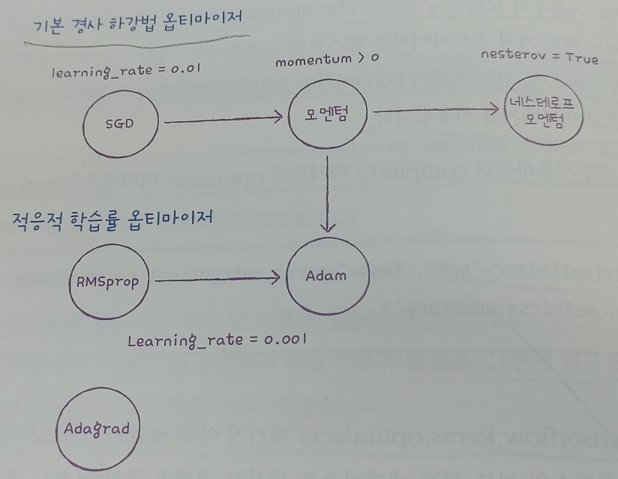

- 기본 경사하강법 옵티마이저는 모두 SGD 클래스에서 제공한다. SGD 클래스의 momentum 매개변수의 기본값은 0이다. 이를 0보다 큰 값으로 지정하면 마치 이전의 그레이디언트를 가속도처럼 사용하는 모멘텀 최적화를 사용한다. 보통 momentum 매개변수는 0.9 이상을 지정한다.

- SGD 클래스의 nesterov 매개변수를 기본값 False에서 True로 바꾸면 네스테로프 모멘텀 최적화 를 사용한다.

- 네스테로프 모멘텀은 모멘텀 최적화를 2번 반복하여 구현한다. 대부분의 경우 네스테로프 모멘텀 최적화가 기본 확률적 경사하강법보다 더 나은 성능을 제공한다.

- 모델이 최적점에 가까이 갈수록 학습률을 낮출 수 있다. 이렇게 하면 안정적으로 최적점에 수렴할 가능성이 높다. 이런 학습률을 적응적 학습률(adaptive learning rate)라고 한다. 이런 방식들은 학습률 매개변수를 튜닝하는 수고를 덜 수 있는 것이 장점이다.

- 적응적 학습률을 사용하는 대표적인 옵티마이저는 Adagrad와 RMSprop이다. 각각 compile() 메서드의 optimizer 매개변수에 'adagrad'와  'rmsprop'으로 지정할 수 있다. optimizer 매개변수의 기본값이 바로 'rmsprop'이다. 이 두 옵티마이저의 매개변수를 바꾸고 싶다면 SGD와 같이 Adagrad와 RMSprop 클래스 객체를 만들어 사용하면 된다.

- 모멘텀 최적화와 RMSprop의 장점을 접목한 것이 Adam이다. Adam은 RMSprop과 함께 맨처음 시도해 볼 수 있는 좋은 알고리즘이다. Adam 클래스도 keras.optimizers 패키지 아래에 있다. 적응적 학습률을 사용하는 이 3개의 클래스는 learning_rate 매개변수의 기본값으로 모두 0.001을 사용한다.

- Adam 클래스의 매개변수 기본값을 사용해 패션 MNIST 모델을 훈련해 보자

- 먼저 모델을 다시 생성한다.

- compile() 함수의 optimizer를 'adam'으로 설정하고 5번의 에포크 동안 훈련하도록 작성

- 이 출력 결과를 보면 기본 RMSprop을 사용했을 때와 거의 같은 성능을 보여준다.
- 검증 세트에서의 성능도 확인해보자

- 환경마다 차이가 있을 수 있지만 여기서는 기본 RMSprop 보다 조금 나은 성능을 낸다.

#### 용어 및 내용 정리
- 심층 신경망은 2개 이상의 층을 포함한 신경망이다. 종종 다층 인공신경망, 심층 신경망, 딥러닝을 같은 의미로 사용
- 렐루 함수는 이미지 분류 모델의 은닉층에서 많이 사용하는 활성화함수이다. 시그모이드 함수는 층이 많을수록 활성화 함수의 양쪽 끝에서 변화가 작기 때문에 학습이 어려워진다. 렐루 함수는 이런 문제가 없으며 계산도 간단하다.
- 옵티마이저는 신경망의 가중치와 절편을 학습하기 위한 알고리즘 또는 방법을 말한다. 케라스에는 다양한 경사하강법 알고리즘이 구현되어 있다. 대표적으로 SGD, 네스테로프 모멘텀, RMSprop, Adam 등이 있다.

#### 핵심 패키지와 함수
TensorFlow

- add()는 케라스 모델에 층을 추가하는 함수 : 케라스 모델의 add() 함수는 keras.layers 패키지 아래에 있는 층의 객체를 입력받아 신경망 모델에 추가한다. add() 함수를 호출하여 전달한 순서대로 층이 차례대로 늘어난다.
- summary() 는 케라스 모델의 정보를 출력하는 함수 : 모델에 추가된 층의 종류와 순서, 모델 파라미터 개수를 출력한다. 층을 만들 때 name 매개변수로 이름을 지정하면 summary() 함수 출력에서 구분하기 쉽다.
- SGD 는 기본 경사하강법 옵티마이저 클래스
   - learning_rate 매개변수로 학습률을 지정하며 기본값은 0.01이다.
   - momentum 매개변수에 0 이상의 값을 지정하면 모멘텀 최적화를 수행한다.
   - nesterov 매개변수를 True로 설정하면 네스테로프 모멘텀 최적화를 수행한다.
- Adagrad는 Adagrad 옵티마이저 클래스이다.
   - learning_rate 매개변수로 학습률을 지정하며 기본값은 0.001이다.
   - Adagrad는 그레이디언트 제곱을 누적하여 학습률을 나눈다. initial_accumulator_value 매개변수에서 누적 초깃값을 지정할 수 있으며 기본값은 0.1이다.
- RMSprop 은 RMSprop 옵티마이저 클래스
   - learning_rate 매개변수로 학습률을 지정하며 기본값은 0.001이다.
- Adam은 Adam 옵티마이저 클래스
   - learning_rate 매개변수로 학습률을 지정하며 기본값은 0.001이다.

##### 머신러닝과 딥러닝의 모델 구조적인 차이
- 사이킷런에서 제공하는 머신러닝 알고리즘들은 좋은 성능을 내기 위해 매개변수를 조정하고 훈련하는 과정을 반복한다. 이런 알고리즘들은 모델의 구조가 어느정도 고정되어 있다고 느낄 수 있다.
- 반면에 딥러닝에서는 모델의 구조를 직접 만든다는 느낌이 훨씬 강하다. 층을 추가하고 층에 있는 뉴런의 개수와 활성화 함수를 결정하는 일들이 그렇다.

##### 케라스 API를 사용해 모델을 훈련하는데 필요한 다양한 도구들을 알아보자.

## **손실곡선**

- fit() 메서드로 모델을 훈련하면 훈련 과정이 상세하게 출력되어 확인 가능하다. History 클래스 객체도 반환한다.
- History 객체에는 훈련 과정에서 계산한 지표, 즉 손실과 정확도 값이 저장되어 있다.
- 이 값을 이용하여 그래프를 그려볼수 있다.

   - 패션 MNIST 데이터셋을 적재하고 훈련세트와 검증세트로 나눈다.

- 그 다음 모델을 만들텐데 간단한 함수를 정의해서 모델을 만들어 보자

- if 구문을 제외하면 이전에 만든 것과 동일한 모델이다. if 구문의 역할은 a_layer 매개변수로 케라스 층을 추가하면 은닉층 뒤에 또 하나의 층을 추가하는 것이다. 
- 여기서는 a_layer 매개변수로 층을 추가하지 않고 단순하게 model_fn() 함수를 호출한다. 그리고 모델의 구조를 출력하면 이전 모델과 동일한 모델이라는 것을 알 수 있다.

- 이전과 같이 훈련하는데 fit() 함수의 결과를 history 변수에 담아보자.
- fit() 함수의 verbose 매개변수를 사용해서 훈련 과정 출력을 조정해 보자. 기본값은 1로 에포크마다 진행 막대와 함께 손실 등의 지표가 출력된다. 2로 바꾸면 진행 막대를 빼고 출력된다. 0으로 지정하면 훈련 과정을 나타내지 않는다. 여기서는 0으로 지정해보자.

- history 객체에는 훈련 측정값이 담겨 있는 history 딕셔너리가 들어 있다. 이 딕셔너리를 확인해 보자

- 손실과 정확도가 포함되어 있다. 케라스는 기본적으로 에포크마다 손실을 계산한다. 정확도는 compile() 함수에서 metrics 매개변수에 'accuracy'를 추가했기 때문에 history 속성에 포함되었다.
- history 속성에 포함된 손실과 정확도는 에포크마다 계산한 값이 순서대로 나열된 단순한 리스트이다. 맷플롯립을 사용해 쉽게 그래프로 그릴 수 있다.

- 정확도도 그래프로 출력해보자

- 확실히 에포크마다 손실이 감소하고 정확도가 향상된다.

- 에포크 횟수를 20으로 늘려서 모델을 훈련하고 손실 그래프를 그려보자

#### 검증손실

- 확률적 경사하강법을 사용했을 때 과대/과소 적합과 에포크 사이의 관계가 있다. 에포크에 따른 과대적학과 과소적합을 파악하려면 훈련 세트에 대한 점수 뿐만 아니라 검증세트에 대한 점수도 필요하다. 훈련세트에 대한 손실만 그려서는 과대/과소적합에 대해 알수 없고 검증세트에 대한 그래프를 같이 그려서 손신을 사용하여 과대/과소적합을 확인해보자.

- 인공신경망 모델이 최적화하는 대상은 정확도가 아니라 손실 함수이다. 가끔은 손실 감소에 비례하여 정확도가 높아지지 않는 경우도 있기 때문에 모델이 잘 훈련되었는지 판단하려면 정확도 보다는 손실 함수의 값을 확인하는 것이 더 낫다.

- 에포크마다 검증 손실을 계산하기 위해 케라스 모델의 fit() 메서드에 검증 데이터를 전달할 수 있다. validation_data 매개변수에 검증에 사용할 입력과 타깃값을 튜플로 만들어 전달하면 된다.

- 20번의 에포크와 검증데이터까지 사용해서 실행하는 시간이 이전 모델보다는 많이 걸린다.

- 반환된 history.history 딕셔너리에 이떤 값이 들어있는지 키를 확인해보자

- 검증 세트에 대한 손실은 'val_loss'에 들어있고 정확도는 'val_accuracy'에 들어있다.
- 과대/과소적합 문제를 확인하기 위해 훈련손실과 검증손실을 한 그래프에 그려서 비교해 보자

- 초기에 검증손실이 감소하다가 다섯 번째 에포크 이후에 다시 상승하기 시작한다. 훈련손실은 꾸준히 감소하기때문에 전형적인 과대적합 모델이 만들어진다. 검증 손실이 상승하는 시점을 가능한 뒤로 늦추면 검증세트에 대한 손실이 줄어들 뿐만 아니라 검증세트에 대한 정확도도 증가할 것이다.

- 과대적합을 막기위해 이전에 사용한 릿지나 라소 등의 규제 방식 대신에 신경망에 특화된 규제 방법을 해보기 전에 옵티마이저 하이퍼파라미터를 조정하여 과대적합을 완화시킬 수 있는지 확인해보자
- 기본 RMSprop 옵티마이저는 많은 문제에서 잘 동작한다. RMSprop 이외의 다른 옵티마이저를 테스트해 본다면 Adam이 좋을듯하다. Adam은 적응적 학습률을 사용하기 때문에 에포크가 진행되면서 학습률의 크기를 조정할 수 있다. Adam 을 적용해서 훈련손실과 검증 손실을 그려보자

In [79]:
model=model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                  validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

NameError: name 'model_fn' is not defined

- 기본 옵티마이저를 사용했을 때보다 Adam 옵티마이저를 사용해서 과대적합이 줄었다는 것을 확인할 수 있다. 검증 손실 그래프에 여전히 요동이 남아 있지만 전반적인 감소추세가 이어진다. 이는 Adam 옵티마이저가 이 데이터셋에 잘 맞는다는 것을 보여준다.
- 더 나은 손실곡선을 얻으려면 학습률을 조정해서 다시 시도해 볼 수 있다.
- 신경망에서 사용하는 대표적인 규제방법을 보자

#### 드롭아웃
- 딥러닝의 아버지로 불리는 제프리 힌턴이 소개
- 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(즉, 뉴런의 출력을 0으로 만들어서) 과대적합을 막는다.
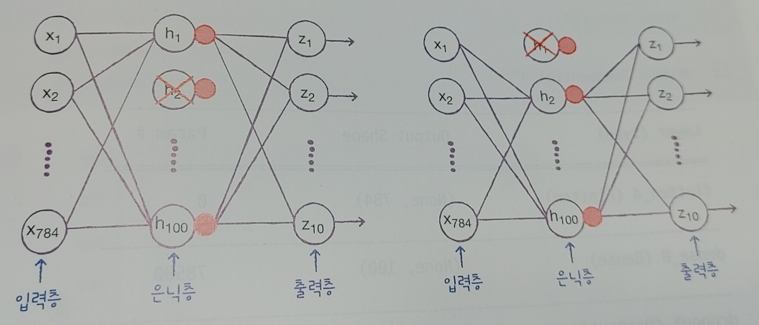

- 뉴런은 랜덤하게 드롭아웃되고 얼마나 많은 뉴런을 드롭할지는 우리가 정해야 할 또 다른 하이퍼파라미터이다.
- 드롭아웃이 왜 과대적합을 막을까? 이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 주의를 기울여야 한다. 일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 이 신경망은 더 안정적인 예측을 만들 수 있을 것이다.

- 케라스에서 드롭아웃을 keras.layers 패키지 아래 Dropout 클래스로 제공한다. 어떤 층의 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 만드는 것이다. 드롭아웃이 층처럼 사용되지만 훈련되는 모델 파라미터는 없다.
- model_fn() 함수에 드롭아웃 객체를 전달하여 층을 추가해보자. 드롭아웃은 30%로 지정해서 작업해보자
- 만들어진 모델의 summary() 함수를 사용해 드롭아웃 층이 잘 추가되었는지 확인해보자

- 은닉층 뒤에 추가된 드롭아웃 층은 훈련되는 모델 파라미터가 없다. 입력과 출력의 크기도 같다. 일부 뉴런의 출력을 0으로 만들지만 전체 출력배열의 크기는 바꾸지 않는다.

- 훈련이 끝난 뒤에 평가나 예측을 수행할 때는 드롭아웃을 적용하지 말아야 한다. 훈련된 모든 뉴런을 사용해야 올바른 예측을 수행할 수 있다. 텐서플로와 케라스는 모델을 평가와 예측에 사용할 때는 자동으로 드롭아웃을 적용하지 않는다.
- 훈련손실과 검증손실의 그래프를 그려서 비교해 보자

- 과대적합이 확실히 줄었다. 열 번째 에포크 정도에서 검증 손실의 감소가 멈추지만 크게 상승하지 않고 어느정도 유지되고 있다.
- 이 모델은 20번의 에포크 동안 훈련을 했기 때문에 결국 다소 과대적합 되어있다. 과대적합되지 않는 모델을 얻기 위해 에포크 횟수를 10으로 하고 다시 훈련해보자

- 에포크 횟수를 10으로 지정해서 훈련한 모델을 나중에 사용하려면 저장해야 함
- 케라스 모델은 훈련된 모델의 파라미터를 저장하는 save_weights() 메서드 제공
- 기본적으로 이 메서드는 텐서플로의 체크포인트 포맷으로 저장하지만 파일의 확장자가 '.h5'일 경우 HDF5 포맷으로 저장한다.(Hierarchical Data Format, 운영체제와 무관하게 사용가능)

- 모델 구조와 모델 파라미터를 함께 저장하는 save() 메서드도 제공
- 이 메서드는 기본적으로 텐서플로의 SavedModel 포맷으로 저장하지만 파일의 확장자가 '.h5'일 경우 HDF5 포맷으로 저장

- 위 2개의 파일이 만들어 졌는지 확인

- 두 가지 실험
- 첫 번째는 훈련을 하지 않은 새로운 모델을 만들고 model-weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용
- 두 번째는 아예 model-whole.h5 파일에서 새로운 모델을 만들어 바로 사용

- 훈련하지 않은 새로운 모델을 만들고 이전에 저장했던 모델 파라미터를 적재했다. 이때 사용하는 함수는 save_weights()와 쌍을 이루는 load_weights() 함수이다.

- 이 모델의 검증 정확도를 확인해보자. 케라스에서 예측을 수행하는 predict() 함수는 사이킷런과 달리 샘플마다 전체 클래스(여기서는 10개의 클래스)에 대한 확률을 반환한다. 패션 MNIST 데이터셋이 다중 분류 문제이기 때문이다.
- 패션 MNIST 데이터셋에서 덜어낸 검증 세트의 샘플 개수는 12,000개이기 때문에 predict() 함수는 (12000 , 10) 크기의 배열을 반환한다.
- 따라서 조금 번거롭지만 10개의 확률 중에 가장 큰 값의 인덱스를 골라 타깃 레이블과 비교하여 정확도를 계산해보자

- 모델 파라미터를 읽은 후 evaluate() 함수를 사용하여 정확도를 출력할 수도 있다. 하지만 evaluate() 함수는 손실을 계산하기 위해 반드시 먼저 compile() 함수를 실행해야 한다. 여기서는 새로운 데이터에 대해 정확도만 계산하면 되는 상황이라고 가정하고 작업한다.

- 모델의 predict() 함수 결과에서 가장 큰 값을 고르기 위해 넘파이 argmax() 함수를 사용했다. 이 함수는 배열에서 가장 큰 값의 인덱스를 반환한다. 예를 들어 배열의 첫 번째 원소가 가장 큰 값일 경우 0을 반환한다. 우리가 사용하는 데이터셋의 타깃값도 0 부터 시작하기 때문에 비교하기 좋다.
- argmax() 함수의 axis=-1은 배열의 마지막 차원을 따라 최대값을 고른다. 검증 세트는 2차원 배열이기 때문에 마지막 차원은 1이된다. axis=1 이면 열을 따라 행의 최대값의 인덱스를 선택하고 axis=0이면 행을 따라 열의 최대값의 인덱스를 선택한다.
- argmax()로 고른 인덱스(val_labels)와 타깃(val_target)을 비교한다. 두 배열에서 각 위치의 값이 같으면 1이되고 다르면 0이된다. 이를 평균하면 정확도가 된다.

- 이번에는 모델 전체를 파일에서 읽은 다음 검증 세트의 정확도를 출력해 보자
- 모델이 저장된 파일을 읽을 때는 케라스가 제공하는 load_model() 함수를 사용

- 지금까지 과정을 돌이켜 보면 20번의 에포크 동안 모델을 훈련하여 검증 점수가 상승하는 지점을 확인하고 그 다음 과대적합 되지 않는 에포크만큼 다시 훈련했다. 모델을 두 번씩 훈련하지 않고 한번에 끝낼 수는 없을까? 드디어 케라스의 콜백을 사용할 차례

### 콜백
- 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체로 keras.callbacks 패키지 아래에 있는 클래스들이다. fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용
- ModelCheckpoint 콜백은 기본적으로 에포크마다 모델을 저장한다. save_best_only=True 매개변수를 지정하여 가장 낮은 검증 점수를 만드는 모델을 저장할 수 있다. 저장될 파일 이름을 'best-model.h5'로 지정하여 콜백을 적용해 보자.

- 모델이 훈련한 후에 best-model.h5 에 최상의 검증 점수를 낸 모델이 저장된다. 이 모델을 load_model() 함수로 읽어서 예측 수행

- ModelCheckpoint 콜백이 가장 낮은 검증 점수의 모델을 자동으로 저장해 주었다. 하지만 여전히 20번의 에포크 동안 훈련을한다.

- 검증 점수가 상승하기 시작하면 그 이후에는 과대적합이 더 커지기 때문에 훈련을 계속할 필요가 없다. 이때 훈련을 중지하면 컴퓨터 자원과 시간을 아낄 수 있다. 이렇게 과대적합이 시작되기 전에 훈련을 미리 중지하는 것을 조기 종료(early stopping) 라고 부르며, 딥러닝 분야에서 널리 사용된다.
- 조기 종료는 훈련 에포크 횟수를 제한하는 역할이지만 모델이 과대적하되는 것을 막아주기 때문에 규제 방법 중 하나로 생각할 수도 있다.

- 케라스에서는 조기 종료를 위한 EarlyStopping 콜백을 제공
- 이 콜백의 patience 매개변수는 검증 점수가 향상되지 않더라도 참을 에포크 횟수로 지정
- 예를 들어 patience=2 로 지정하면 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지한다.
- restore_best_weights 매개변수를 True로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌린다.

- EarlyStopping 콜백을 ModelCheckpoint 콜백과 함께 사용하면 가장 낮은 검증 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할 때 훈련을 중지할 수 있다. 또한 훈련을 중지한 다음 현재 모델의 파라미터를 최상의 파라미터로 되돌린다.

- 이 두 콜백을 함께 사용해 보자

- 훈련을 마치고 나면 몇 번째 에포크에서 훈련이 중지되었는지 early_stopping_cb 객체의 stopped_epoch 속성에서 확인할 수 있다.

- 결과 숫자는 다를 수 있다. 에포크 횟수는 0부터 시작하기 때문에 8은 아홉번째 에포크에서 훈련이 중지되었다는 것을 의미한다. patience를 2로 지정했으므로 최상의 모델은 7번째 에포크일 것이다.
- 훈련 손실과 검증 손실을 출력해서 확인해 보자

- 조기 종료 기법을 사용하면 안심하고 에포크 횟수를 크게 지정해도 괜찮다. 컴퓨터 자원과 시간을 아낄 수 있고 ModelCheckpoint 콜백과 함께 사용하면 최상의 모델을 자동을 저장해 주므로 편리하다.
- 조기 종료로 얻은 모델을 사용해 검증 세트에 대한 성능을 확인해 보자